## K-means clustering 실습 2

### 신용카드 사용 데이터


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기: 고객 데이터셋

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv'
customer = pd.read_csv(file_url)

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [3]:
customer.head()

# cc_num 신용카드 번호, category 카드 사용 분류, amt 사용 금액

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [4]:
customer['cc_num'].nunique()

# unique 한 cc_num 개수는 100개

100

In [5]:
customer['category'].nunique()

# unique 한 category 개수는 11개

11

### 전처리 : Feature Engineering (피처 엔지니어링)


In [6]:
# get_dummies 를 사용하여 category 카드 사용 분류 컬럼을 one-hot encoding

customer_dummy = pd.get_dummies(customer, columns =['category'])
customer_dummy.head()

# category 를 모두 분류하고 true 라고 표시된 것은 해당 카드 사용 분류를 사용한 것이고, false 라고 표시된 것은 해당 카드 사용 분류를 사용하지 않은 것
# category 가 11개 이므로 더미 변수 11개가 추가됨

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,False,False,False,False,False,False,False,True,False,False,False
1,630423337322,107.23,False,False,False,True,False,False,False,False,False,False,False
2,38859492057661,220.11,True,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,False,False,True,False,False,False,False,False,False,False,False
4,375534208663984,41.96,False,False,False,False,False,False,False,True,False,False,False


In [7]:
# cc_num 을 제외하고, 나머지 amt 와 category 컬럼들을 곱하여 사용 금액을 계산

cat_list = customer_dummy.columns[2:]

# amt(금액)로 변수 업데이트
for i in cat_list:
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']

customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [8]:
# 각 거래 건으로 정리된 데이터를 고객 cc_num 을 기준으로 groupby 하여 고객별 총 사용 금액 및 카테고리별 사용 금액 계산

customer_agg = customer_dummy.groupby('cc_num').sum()

customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [9]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 60495593109 to 4956828990005111019
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB


In [10]:
# K-means 알고리즘은 거리(distance) 기반의 알고리즘이므로, 데이터의 스케일이 다르면 제대로된 군집화가 어려울 수 있음
# 따라서, 스케일링을 통해 데이터의 스케일을 맞추어 주어야 함
# 여기서는 StandardScaler 를 사용하여 각 변수의 평균이 0, 분산이 1이 되도록 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg),
            columns = customer_agg.columns,
            index=customer_agg.index) # 스케일링 후 데이터프레임으로 변환

In [11]:
scaled_df.head()

# 다른 고객들과 비슷한 수준이면, 즉 평균에 가까울 경우는 0에 근접한 값을 나타내게 되고,
# 더 많이 사용했으면 더 큰 양수를, 더 적게 사용했으면 더 작은 음수값을 나타냄

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


### 고객 데이터 모델링 및 실루엣 계수

<Axes: >

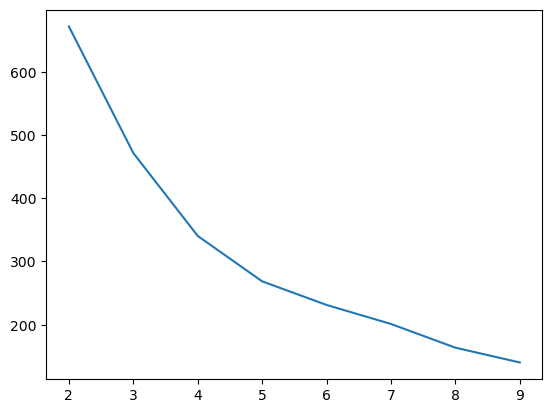

In [12]:
# 현재로써는 적절한 k 값을 모르기 때문에 엘보우 방법을 사용하여 적절한 k 값을 찾아보기
distance = []

for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    distance.append(k_model.inertia_)

sns.lineplot(x=range(2,10), y=distance)

In [13]:
# 엘보우 기법과 같이 최적의 클러스터 수를 찾기 위해 실루엣 점수를 계산
# 엘보우 기법에서 적절한 클러스터 수를 찾지 못했을 때 대안으로 사용할 수 있음

from sklearn.metrics import silhouette_score

In [14]:
silhouette = []

for k in range(2,10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels))

<Axes: >

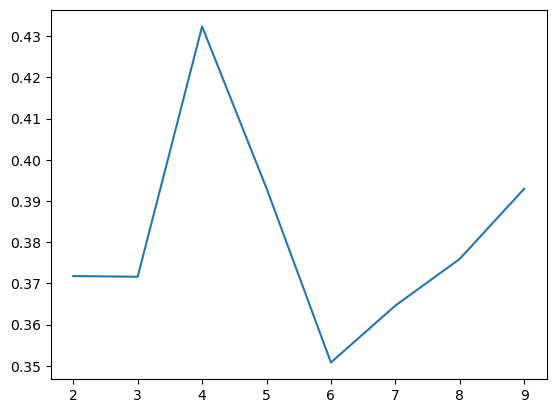

In [15]:
sns.lineplot(x=range(2,10), y=silhouette)

# 실루엣 점수가 가장 높은 k 값을 선택 -> k=4

### 최종 예측 모델 및 결과 해석


In [16]:
k_model = KMeans(n_clusters=4)

k_model.fit(scaled_df)

labels = k_model.predict(scaled_df)

In [17]:
# labels 를 기존의 데이터프레임 scaled_df 에 새로운 컬럼으로 추가

scaled_df['label'] = labels

In [18]:
# 클러스터링 결과를 해석하기 위하여 label 별로 데이터 요약: label 별 평균값
scaled_df_mean = scaled_df.groupby('label').mean() 

# label 별 고객 수를 scaled_df_count 에 저장
scaled_df_count = scaled_df.groupby('label').count()['category_travel']

In [19]:
# 'count' 로 이름 변경
scaled_df_count = scaled_df_count.rename('count')

In [20]:
# 데이터 합치기
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [21]:
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10


### 해설

- 클러스터 0(label 0인 그룹)은 전체 지출액부터 각 범주의 금액까지 모두 타 클러스터에 비해 낮음

    - 여기에 속하는 고객 수는 45명으로 가장 많음

- 클러스터 1은 gas_transport 에서 상대적으로 조금 높은 지출을 보이지만, 전체 지출 및 각 범주에서 대부분 0 에 가까운 숫자를 보임

    - 여기에 속하는 고객 수는 37명으로 딱히 특징이 없는(?) 일반 고객군으로 분류

- 클러스터 2는 home, travel 에서 다른 클러스터보다 지출이 높음 
    
    - travel 이 매우 높게 나온 클러스터로, 여행에 관심이 많은 고객군으로 정의할 수 있음

- 클러스터 3은 전체 지출금액부터 대다수의 범주에서 높은 지출을 나타냄

    - 여기에 속하는 고객 수는 10명으로 상위 10%의 VIP 고객에 해당함
